<div class="container" style="border:1px solid white">
 <h1 style="text-align:center">CIS 380 Data Management 8</h1>

<h4 style="text-align:center;"></h4>
<a href="#" target="_blank"><img width="200px" height="180px" src="https://crafter.ai/wp-content/uploads/2020/08/Googles-API-for-Speech-to-Text.png" style="display:block; margin:auto;"></a>

<p>Let's learn API  </p>

</div>


#### The data from the OpenWeatherMap API provides detailed weather forecasts, including temperature, humidity, wind speed, and weather conditions (like rain or clear skies) for specified locations. By accessing this data through an API request, users can receive up-to-date and accurate weather information in a structured format, typically in JSON. This data can then be parsed and used for various applications, such as creating visualizations, performing statistical analysis, or integrating into other software solutions to enhance functionality with real-time weather updates.

<div class="container" style="font-size:14px; padding:10px; border:1px solid green">
<h3 style="color:green;">Please type your name here:</h3>
<br>
<p> Jesse Martinez
     </p>

</div>

                 Date  Temperature (F) Description
0 2025-04-08 21:00:00            74.64   clear sky
1 2025-04-09 00:00:00            74.01  few clouds
2 2025-04-09 03:00:00            69.85   clear sky
3 2025-04-09 06:00:00            66.63   clear sky
4 2025-04-09 09:00:00            65.03   clear sky


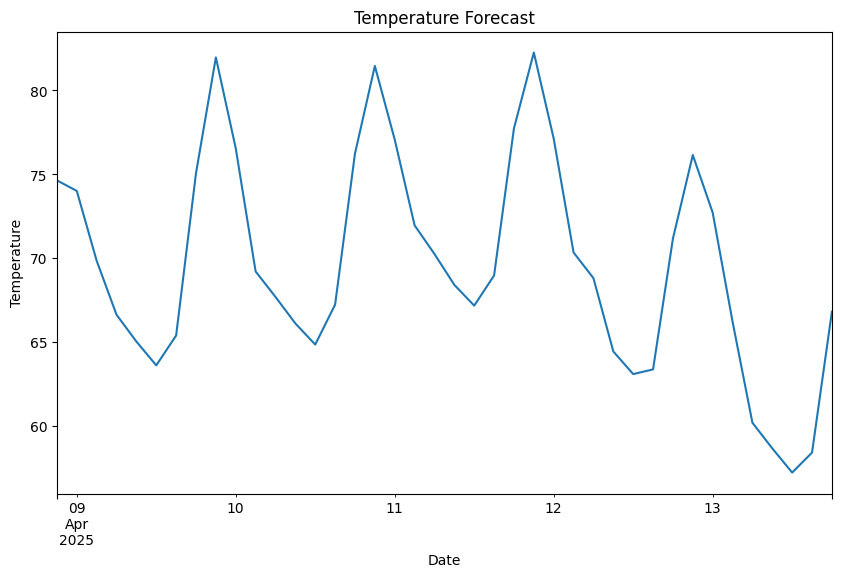

In [34]:

# import modules
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Register on OpenWeatherMap and get your API key
apiKey='7904adff7d326ff1bf7f19f8ba354579'

# Set up the API request URL and parameters
url="http://api.openweathermap.org/data/2.5/forecast"
params={
    "q": "Los Angeles, US",
    "appid":apiKey,
    "units":"imperial"
}
# Send a GET request and get the response
response=requests.get(url, params=params)

# Check if the API data was successfully retrieved
if response.status_code==200:

    data = response.json()

    #Data format and DataFrame
    weather_data = []
    for forecast in data.get('list', []):
       timestamp = forecast.get('dt')
       date = pd.to_datetime(timestamp, unit='s')
       temperature = forecast['main'].get('temp')
       weather_description = forecast['weather'][0].get('description')
       weather_data.append({'Date': date, 'Temperature (F)': temperature, 'Description': weather_description})

    df = pd.DataFrame(weather_data)

    # outdata
    print(df.head())

	# set date as index
    df.set_index('Date', inplace=True)

    # plot results
    plt.figure(figsize=(10, 6))

    df["Temperature (F)"].plot()
    plt.title("Temperature Forecast")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.show()


else: 
    print("Failed to fetch data from the API. Status code:", response.status_code)

In [2]:
#display the results

#### The OMDB (Open Movie Database) API provides access to a vast collection of movie data, including information on films, series, and actors. It allows users to retrieve detailed data such as movie titles, release dates, genres, cast, director, plot summaries, and ratings. This API is particularly useful for developers and data analysts who need to incorporate comprehensive movie information into their applications, conduct research, or perform data analysis related to the film industry. By using the OMDB API, you can easily access and manipulate movie data to create rich, informative, and interactive applications.

In [ ]:
import requests

omdbAPI=" f496060"
# Function to fetch movie data from OMDB API
def fetch_movie_data(title):
	# OMDB API endpoint and parameters
	url = "http://www.omdbapi.com/"
	params = {
    	"apikey": omdbAPI,
    	"t": title  # Title of the movie
	}

	# Sending GET request and getting response
	response = requests.get(url, params=params)
   
    # Checking if request was successful (status code 200)
	if response.status_code == 200:
        # Converting response to JSON format
         data = response.json()


       # Checking if movie data exists
        if data.get('Response') == 'True':
            return data
        else:
            return None
    else:
        # if request failed, print error message
        print("Failed to fetch data from the API. Status code:", response.status_code)
        return None


TabError: inconsistent use of tabs and spaces in indentation (<string>, line 23)

In [ ]:
# Example usage

movieTitle="Toy Story"
movieData=fetch_movie_data(movieTitle)
    if movieData:
    print("Title", movieData['Title'])
    print("Year:", movieData["Year"])
    print("IMDB Rating:", movieData["imdbRating"])
    print("Plot:", movieData["Plot"])
    print("Box Office:", movieData["BoxOffice"])

    else: 
    print("Movie is not found or errors.")